## weather Type Classification.

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [112]:
df=pd.read_csv("weather_classification_data.csv")

In [113]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [115]:
df['Cloud Cover'].value_counts()

Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64

In [116]:
df['Weather Type']

0         Rainy
1        Cloudy
2         Sunny
3         Sunny
4         Rainy
          ...  
13195     Rainy
13196     Snowy
13197    Cloudy
13198     Snowy
13199     Rainy
Name: Weather Type, Length: 13200, dtype: object

In [117]:
df['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

In [118]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [119]:
df.duplicated().sum()

0

### some analysis

<Axes: xlabel='Season', ylabel='count'>

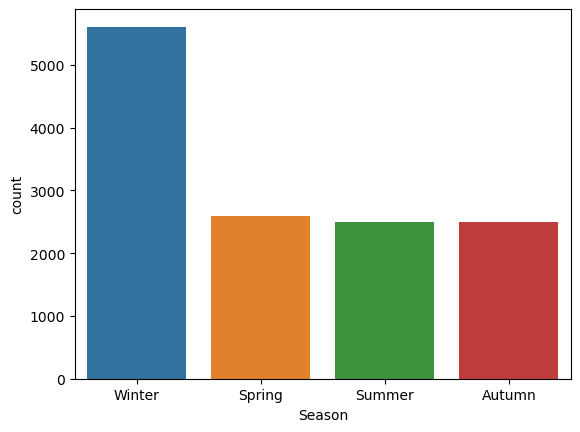

In [120]:
sns.countplot(x='Season' ,data=df)

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'Wind Speed'}>],
       [<Axes: title={'center': 'Precipitation (%)'}>,
        <Axes: title={'center': 'Atmospheric Pressure'}>,
        <Axes: title={'center': 'UV Index'}>],
       [<Axes: title={'center': 'Visibility (km)'}>, <Axes: >, <Axes: >]],
      dtype=object)

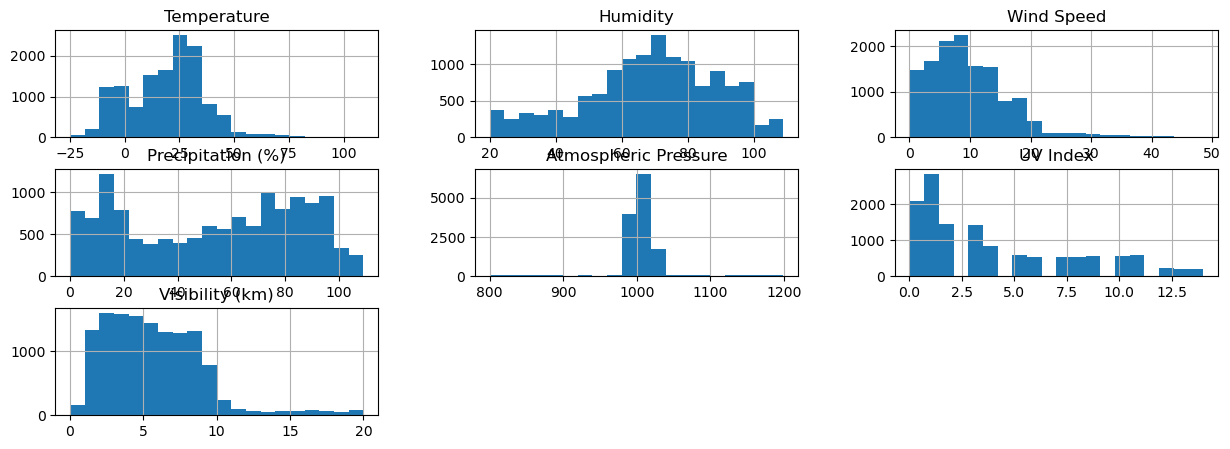

In [121]:
df.hist(bins=20,figsize=(15,5))

### cloud  cover

In [122]:
plt.figure(figsize=(10,10))


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, 'Cloud Cover')

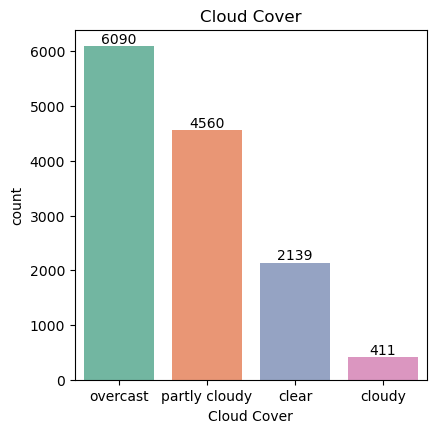

In [123]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
ax = sns.countplot(x = df['Cloud Cover'],order=df['Cloud Cover'].value_counts(ascending=False).index,palette = 'Set2');
abs_values = df['Cloud Cover'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xlabel("Cloud Cover")
plt.title("Cloud Cover")

### season

Text(0.5, 1.0, 'Season')

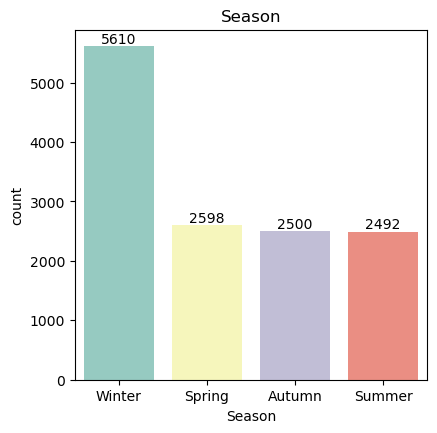

In [124]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,2)
ax1 = sns.countplot(x = df['Season'],order=df['Season'].value_counts(ascending=False).index, palette = 'Set3');
abs1_values = df['Season'].value_counts(ascending=False).values
ax1.bar_label(container=ax1.containers[0], labels=abs1_values)
plt.xlabel("Season")
plt.title("Season")


### Location

Text(0.5, 1.0, 'Location')

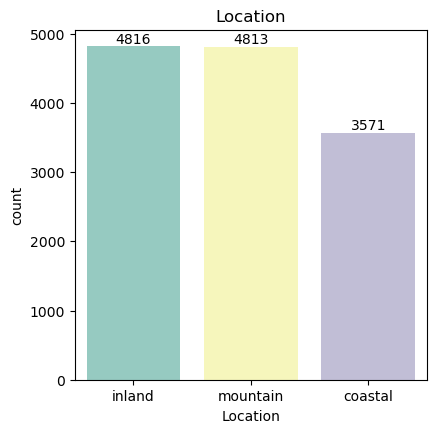

In [125]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,3)
ax2 = sns.countplot(x = df['Location'],order=df['Location'].value_counts(ascending=False).index, palette = 'Set3');
abs2_values = df['Location'].value_counts(ascending=False).values
ax2.bar_label(container=ax2.containers[0], labels=abs2_values)
plt.xlabel("Location")
plt.title("Location")

### weather Type

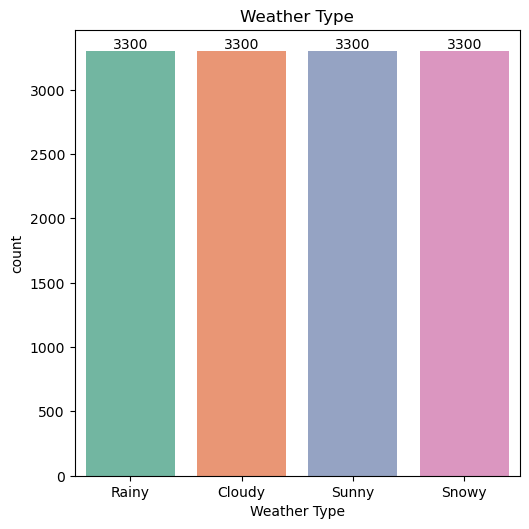

In [126]:
plt.figure(figsize=(10, 10))
plt.subplot(2,2,4)
ax3 = sns.countplot(x = df['Weather Type'],order=df['Weather Type'].value_counts(ascending=False).index, palette = 'Set2');
abs3_values = df['Weather Type'].value_counts(ascending=False).values
ax3.bar_label(container=ax3.containers[0], labels=abs3_values)
plt.xlabel("Weather Type")
plt.title("Weather Type")

plt.tight_layout()
plt.show()

d:\Users\hi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Users\hi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Humidity', ylabel='Temperature'>

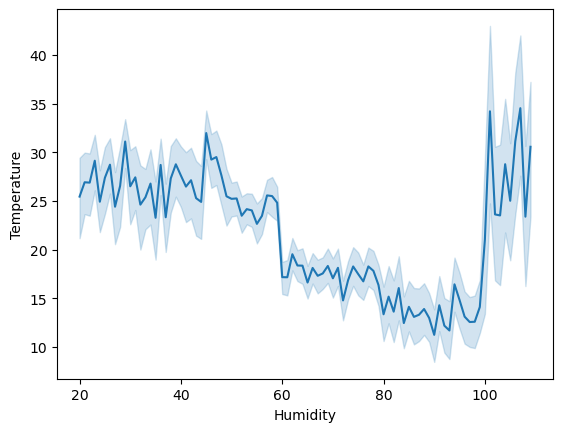

In [127]:
plt.subplt=((10,6))
sns.lineplot(data=df, x='Humidity',y='Temperature')

d:\Users\hi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Users\hi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

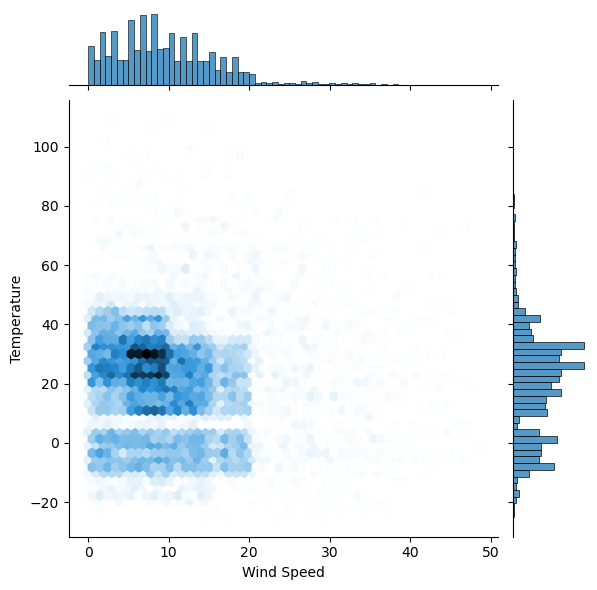

In [128]:
plt.figure(figsize = (10, 6))
sns.jointplot(data = df, x = 'Wind Speed', y = 'Temperature', kind ='hex')


<Axes: xlabel='Atmospheric Pressure', ylabel='Temperature'>

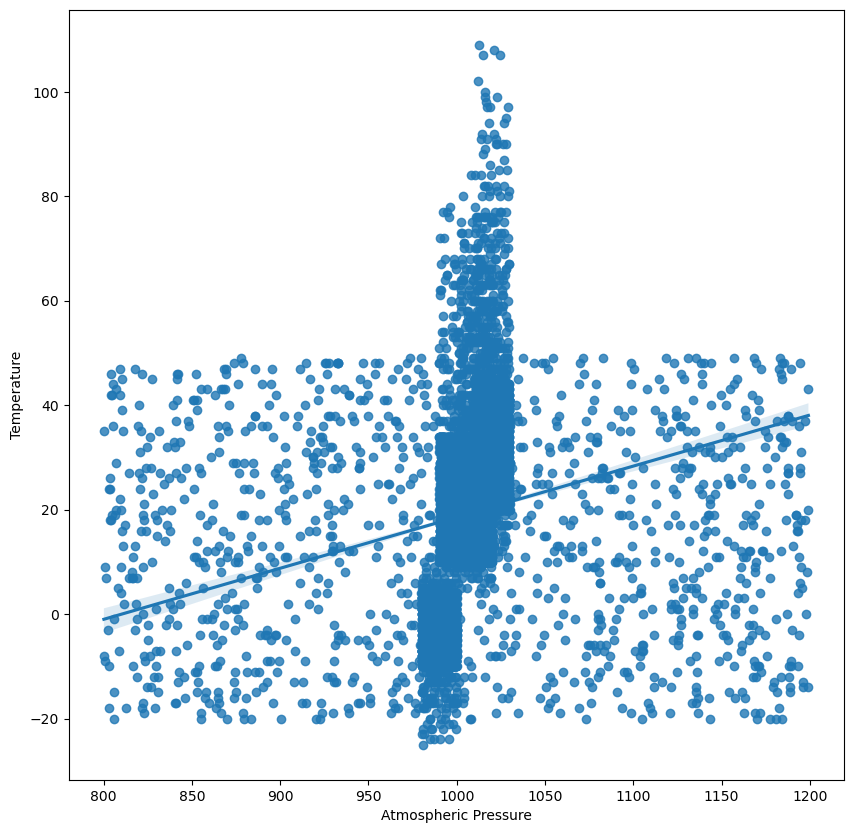

In [134]:
plt.figure(figsize=(10,10))
sns.regplot(data=df,x='Atmospheric Pressure',y = 'Temperature')

<Axes: xlabel='Season', ylabel='Wind Speed'>

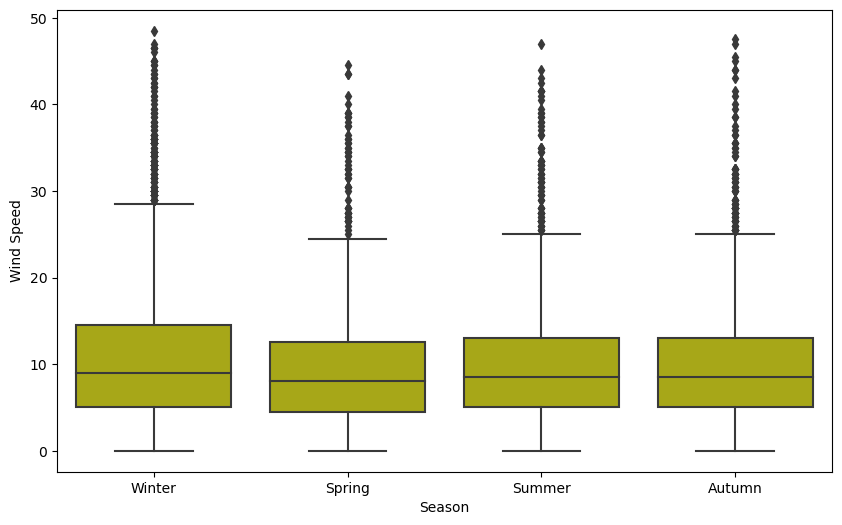

In [135]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Season', y='Wind Speed',color="y")

<Axes: xlabel='Weather Type', ylabel='Humidity'>

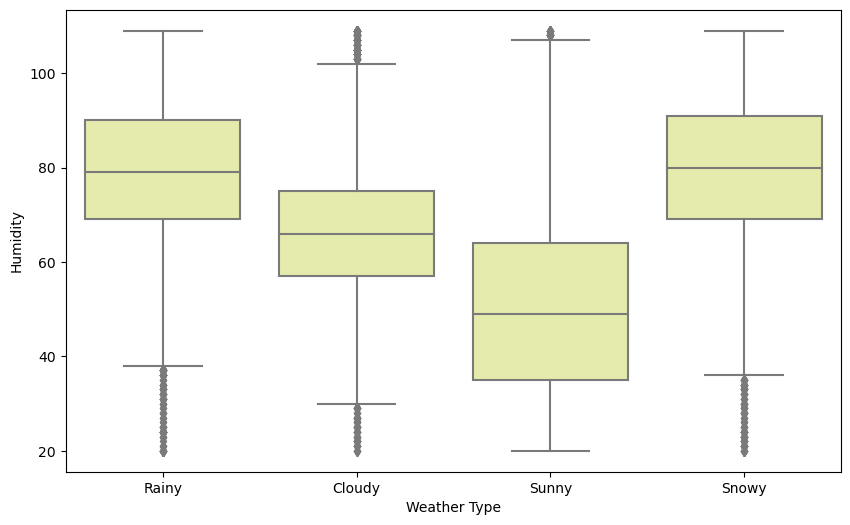

In [136]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Weather Type', y='Humidity', color='#EDF5A2')

### Convert categorical values ​​to numerical

In [137]:
le_Cloud_Cover = LabelEncoder()
le_Season = LabelEncoder()

le_Location  = LabelEncoder()
le_Weather_Type  = LabelEncoder()


data['Cloud_Cover1'] = le_Cloud_Cover.fit_transform(data['Cloud Cover'])
data['Season1'] = le_Season.fit_transform(data['Season'])
data['Location1'] = le_Location.fit_transform(data['Location'])
data['Weather_Type1'] = le_Weather_Type.fit_transform(data['Weather Type'])

NameError: name 'data' is not defined

In [ ]:
df = pd.read_csv('weather_classification_data.csv')
df

In [ ]:
df.info()

### Correlation matrix to know important coloumn

In [ ]:
correlation_matrix=df.corr()
plt.figure(figsize=(10,10))
correlation_matrix = df.select_dtypes(include=[float, int]).corr()

sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

### Visualization

In [ ]:

def plot_outliers(df):
    plt.figure(figsize=(12, 6))
    
    for col in df.columns:
        #Calculate Q1, Q3 and IQR        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        is_outlier = (df[col] < lower_bound) | (df[col] > upper_bound)
        
        #  Draw Scatter Plot
        plt.subplot(1, len(df.columns), df.columns.get_loc(col) + 1)
        plt.scatter(df.index, df[col], c=is_outlier, cmap='coolwarm', label='Outliers')
        plt.axhline(y=lower_bound, color='r', linestyle='--', label='Lower Bound')
        plt.axhline(y=upper_bound, color='r', linestyle='--', label='Upper Bound')
        plt.title(col)
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Draw outliers
plot_outliers(df)